In [8]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    user='root',
    password='12345',
    host='localhost',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Administrator/Desktop/_sql'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [7]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as ps
import matplotlib.pyplot as plt
import seaborn as sns 
import mysql.connector

a=mysql.connector.connect(host="localhost",
                           username="root",
                           password="12345",
                           database="ecommerce")
cur=a.cursor()


# List all unique cities where customers are located.

In [4]:
query=""" select distinct(customer_city) from customers"""
cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [15]:
query=""" select count(order_id) from ecommerce.orders where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data=cur.fetchall()
'total orders placed in 2017 are',data[0][0]

('total orders placed in 2017 are', 270606)

# Find the total sales per category.

In [20]:
import pandas as ps
query="""select products.product_category as category,
round(sum(payments.payment_value),2) as sales 
from ecommerce.products join ecommerce.order_items
on products.product_id = order_items.product_id
join ecommerce.payments
on payments.order_id = order_items.order_id 
group by category;"""
cur.execute(query)
data=cur.fetchall()
df=ps.DataFrame(data,columns=["category","sales"])
df

,category,sales
0,HOUSE PASTALS OVEN AND CAFE,1353401.76
1,Cool Stuff,20681973.66
2,toys,16822142.16
3,technical books,681991.92
4,computer accessories,43533752.16
...,...,...
69,cds music dvds,34684.68
70,La Cuisine,77574.24
71,Fashion Children's Clothing,18856.08
72,PC Gamer,54268.08


# Calculate the percentage of orders that were paid in installments.

In [9]:
query=""" select (sum(case when payment_installments >=1 then 1 
else 0 end)) /count(*)*100 from payments """

cur.execute(query)
data=cur.fetchall()
'The percentage of orders that were paid in installments is', data[0][0]

('The percentage of orders that were paid in installments is',
 Decimal('99.9983'))

# Count the number of customers from each state

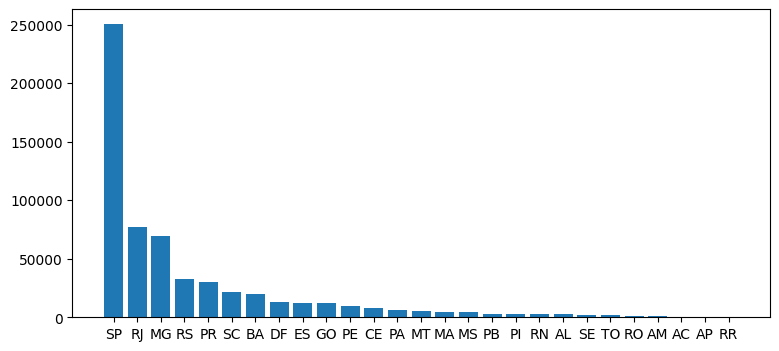

In [21]:
query=""" select customer_state ,count(customer_id)
from customers group by customer_state"""
cur.execute(query)

data=cur.fetchall()
df=ps.DataFrame(data,columns=['state','customer_count'])
df=df.sort_values(by = "customer_count",ascending= False)

plt.figure(figsize =(9,4))
plt.bar(df['state'],df['customer_count'])

plt.show()

# Intermediate Queries
# 1. Calculate the number of orders per month in 2018

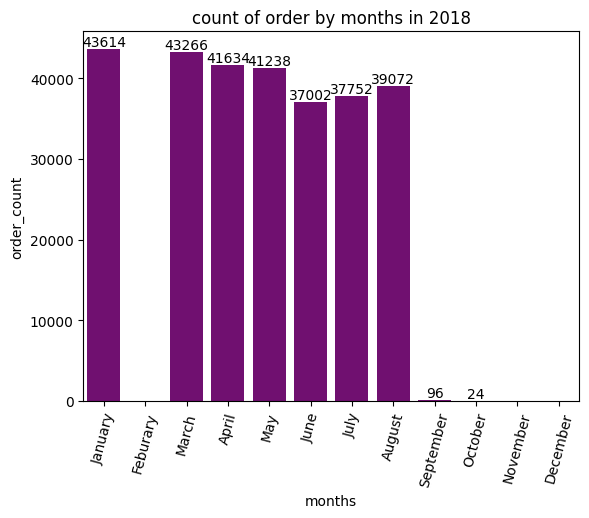

In [9]:
query=""" select monthname(order_purchase_timestamp) months,count(order_id) order_count
from ecommerce.orders where year(order_purchase_timestamp)= 2018
group by months """

cur.execute(query)

data=cur.fetchall()
df=ps.DataFrame(data,columns=['months','order_count'])

order=['January','Feburary','March','April','May','June','July','August','September','October','November','December']#for order purpose
ax=sns.barplot(x=df['months'],y=df['order_count'],data=df, order= order,color='purple')

ax.bar_label(ax.containers[0])#for value
plt.xticks(rotation=75)
plt.title('count of order by months in 2018')
plt.show()



#  Find the average number of products per order, grouped by customer city.

In [27]:

query=""" create TABLE ecommerce.cp
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from ecommerce.orders join ecommerce.order_items 
on ecommerce.orders.order_id = ecommerce.order_items.order_id
group by ecommerce.orders.order_id, ecommerce.orders.customer_id);

create view avg_per_order as 
select customers.customer_city, round(avg (cp.oc),2) average_oorders
from ecommerce.customers join ecommerce.cp
on ecommerce.customers.	customer_id=ecommerce.cp.customer_id
group by ecommerce.customers.customer_city"""

cur.execute(query)

data=cur.fetchall()
data

[]

#  Calculate the percentage of total revenue contributed by each product category.


In [ ]:
sum1="""
with a as
(select upper(products.product_category) as category , 
sum(payments.payment_value) as sales 
from ecommerce.products
join ecommerce.order_items
on ecommerce.products.product_id= ecommerce.order_items.product_id 
join  ecommerce.payments
on ecommerce.payments.order_id=ecommerce.order_items.order_id group by category) select sum(sales) from a;

"""
query="""select upper(products.product_category) as category , 
sum(payments.payment_value) as sales 
from ecommerce.products
join ecommerce.order_items
on ecommerce.products.product_id= ecommerce.order_items.product_id 
join  ecommerce.payments
on ecommerce.payments.order_id=ecommerce.order_items.order_id group by category"""

cur.execute(sum1)

data=cur.fetchall()
#print(data)
cur.execute(query)
data1=cur.fetchall()
#print(data1)

data2=[]
for i in data1:
    a=(i[1]/data[0][0])*100
    b=(i[0],a)
    data2.append(b)

print(data2)


# Identify the correlation between product price and the number of times a product has been purchased.

In [16]:
query="""select upper(products.product_category) , count(order_items.product_id),
round(avg(order_items.price),2) 
from ecommerce.products join ecommerce.order_items 
on ecommerce.products.product_id= ecommerce.order_items.product_id group by ecommerce.products.product_category;
"""
cur.execute(query)
data=cur.fetchall()
df=ps.DataFrame(data,columns=["category","order_count","price"])

import numpy as np
arr1=df['order_count']
arr2=df['price']

a=np.corrcoef([arr1,arr2])
print("The corelation between",a[0][1],',',a[1][0])

The corelation between -0.10615572023719372 , -0.10615572023719372


#  Calculate the total revenue generated by each seller, and rank them by revenue.

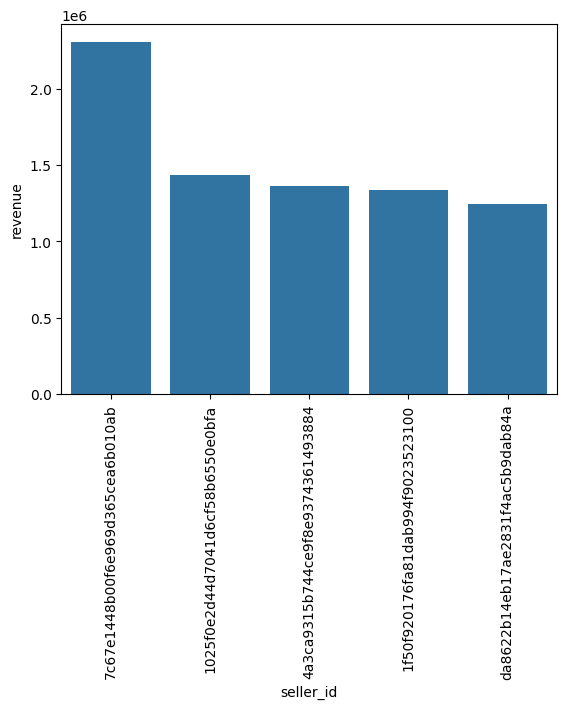

In [10]:
import pandas as pd
query="""select *,dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id,sum(payments.payment_value) 
revenue from order_items join ecommerce.payments
on ecommerce.order_items.order_id=ecommerce.payments.order_id
group by order_items.seller_id) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['seller_id','revenue','rank'])
df=df.head()#top 5 chart
plt.xticks(rotation=90)
sns.barplot(x='seller_id',y='revenue',data=df)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [4]:
query="""select customer_id, order_purchase_timestamp,
avg(payment) over(partition by 	ecommerce.orders.customer_id order by 
ecommerce.orders.order_purchase_timestamp rows between 2 preceding and current row )  
as moving_average from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment 
from ecommerce.payments join ecommerce.orders
on ecommerce.payments.order_id = ecommerce.orders.order_id) as a; """


cur.execute(query)

data=cur.fetchall()
data

[('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('00012a2ce6f8dcda20d059ce98491703', '2017-11-14 16:08:26', 114.74),
 ('000161a058600d5901f007fab4c27140', '2017-07-16 09:40:32', 67.41),
 ('000161a058600d5901f007fab4c27140', '2017-07-16 09:40:32', 67.41),
 ('000161a058600d5901f